<a href="https://www.kaggle.com/fangya/find-pet-a-home-eda-dtree-cnn?scriptVersionId=87915424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import HTML, display
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

train = pd.read_csv("/kaggle/input/petfinder-pawpularity-score/train.csv")


## Introduction

1. EDA + data visualization
2. Python Image (IPython.display, PIL )
3. * CNN, neutral networks， detectron, yolo, mask rcnn

In [2]:
from IPython.display import Image
from IPython.display import HTML, display
from PIL import Image, ImageFilter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data_dr="../input/petfinder-pawpularity-score"
train=pd.read_csv(data_dr+"/train.csv")
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [4]:
train.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [5]:
# Cut Level for Powpularity
powcat=pd.cut(train.Pawpularity, bins=[0,40,60,85,100], 
             labels=["Open_B16", "Sweet" ,"Cute", "Home"])
train.insert(14,"Powcat", powcat)

In [6]:
cuteness=pd.cut(train.Pawpularity, bins=[0,40,60,85,100], 
             labels=[0, 1, 2, 3])
train.insert(15,"Cuteness", cuteness)


In [7]:
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Powcat,Cuteness
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,Cute,2
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,Sweet,1
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,Open_B16,0
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,Open_B16,0
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,Cute,2


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Powcat', ylabel='count'>

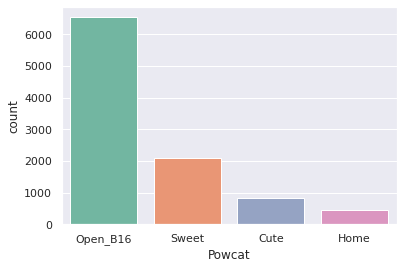

In [8]:
sns.set()
sns.countplot(train["Powcat"],palette="Set2")

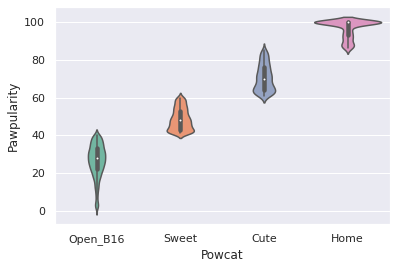

In [9]:
fig=plt.figure()
ax=sns.violinplot(x="Powcat" , y="Pawpularity",palette="Set2", data=train)
plt.show()

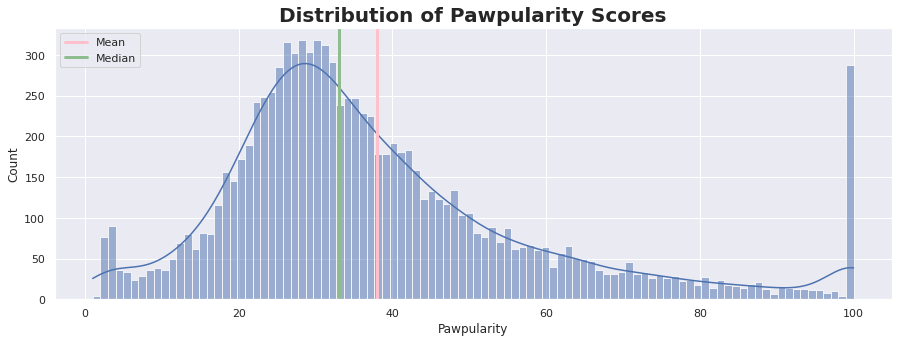

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
fig=plt.figure()
sns.histplot(data=train, x="Pawpularity",kde=True, bins=100)
plt.axvline(train["Pawpularity"].mean(),c="pink",ls="-", lw=3, label="Mean")
plt.axvline(train["Pawpularity"].median(),c="darkseagreen",ls="-",lw=3,label="Median")
plt.title("Distribution of Pawpularity Scores", fontsize=20,fontweight="bold")
plt.legend()
plt.show()

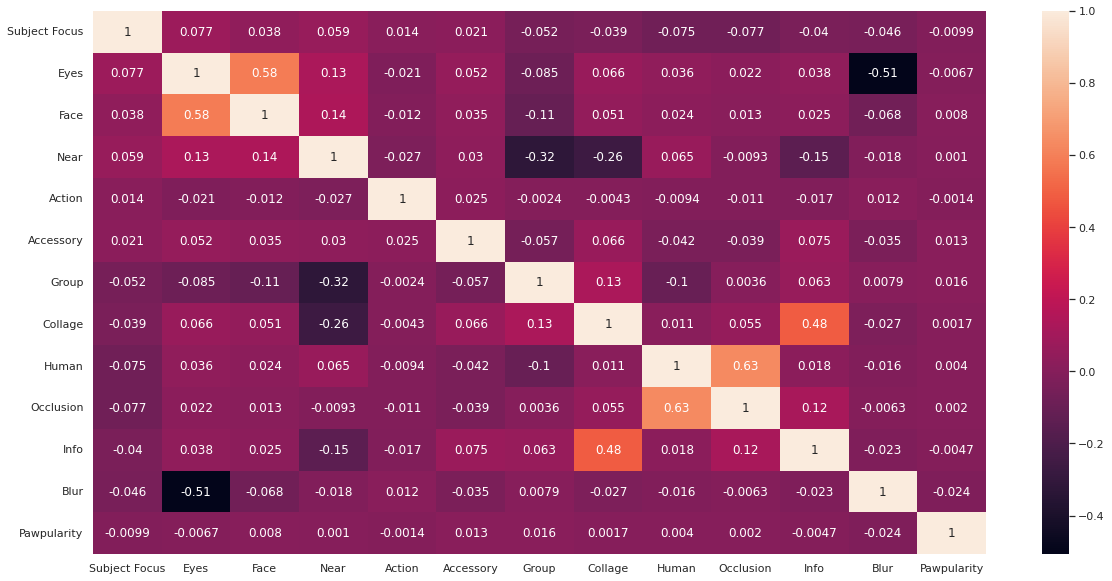

In [11]:
pet_ft=train.drop(["Id","Pawpularity","Powcat"], axis=1)
y=train.Pawpularity
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [12]:
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Powcat,Cuteness
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,Cute,2
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,Sweet,1
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,Open_B16,0
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,Open_B16,0
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,Cute,2


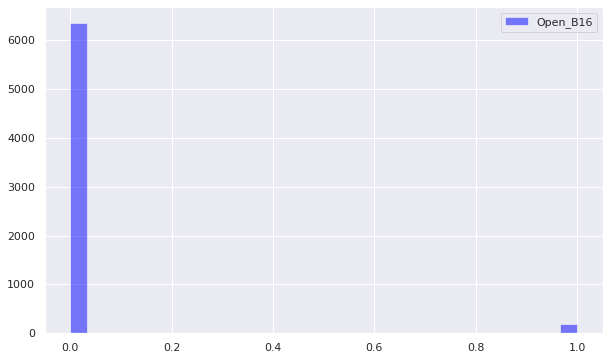

In [13]:
plt.figure(figsize=(10,6))
train[train["Powcat"]=="Open_B16"]['Subject Focus'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Open_B16')
# df[df['converted']==0]['total_pages_visited'].hist(alpha=0.5,color='red',
#                                               bins=30,label='converted=0')
plt.legend()
# plt.xlabel('total_pages_visited')


# "Open_B16", "Sweet" ,"Cute", "Home"

In [14]:
def fplot(var,label):
    fig, ax=plt.subplots(1,3)
    sns.violinplot(x=var, y="Pawpularity",data=train,palette="Set2",ax=ax[0])
    sns.histplot(train,x="Pawpularity", hue=var, palette="Set2",kde=True,ax=ax[1])
    sns.countplot(x=var,hue="Powcat",data=train,palette="Set2", ax=ax[2])
    plt.suptitle(label)
    return plt
fig.show()  

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

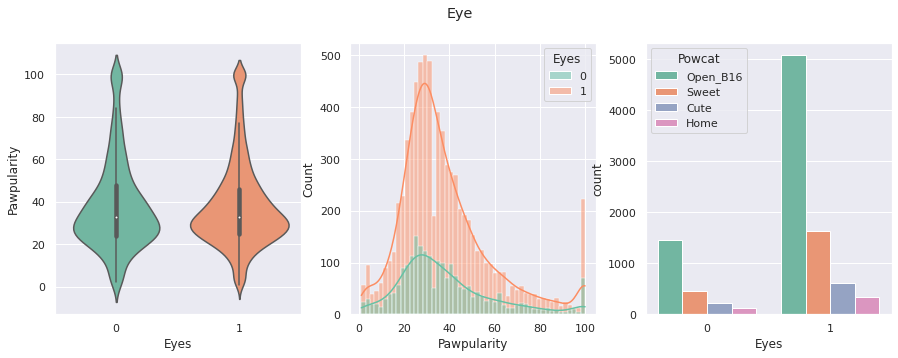

In [15]:
fplot("Eyes", "Eye")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

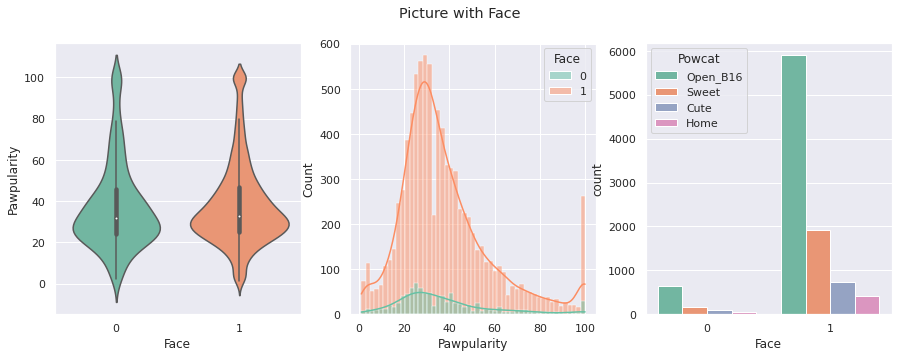

In [16]:
fplot("Face", "Picture with Face")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

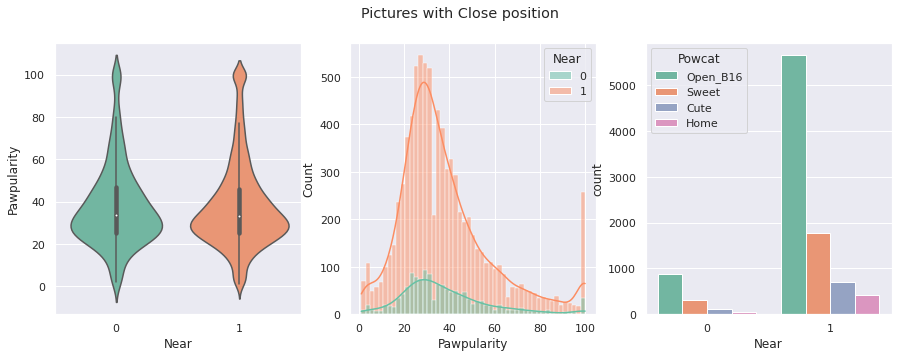

In [17]:
fplot("Near", "Pictures with Close position")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

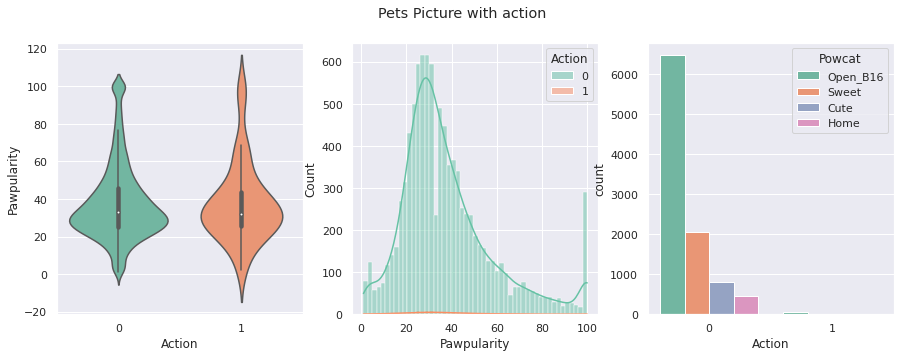

In [18]:
fplot("Action", "Pets Picture with action")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

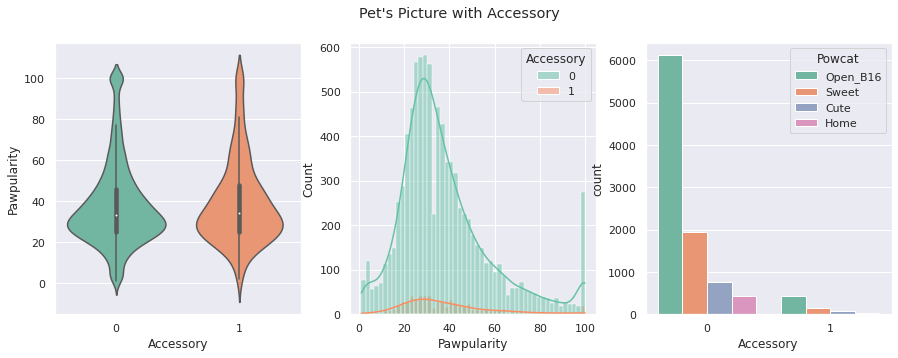

In [19]:
fplot("Accessory", "Pet's Picture with Accessory")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

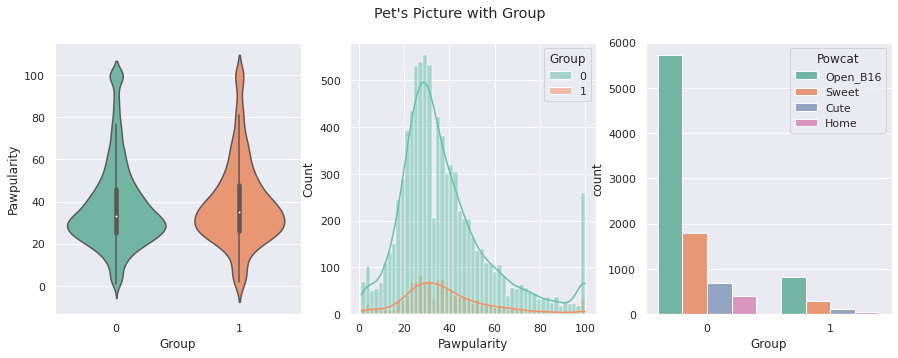

In [20]:
fplot("Group", "Pet's Picture with Group")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

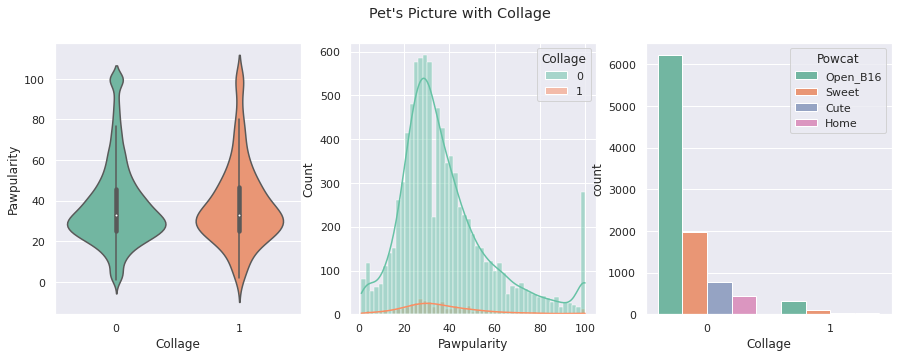

In [21]:
fplot("Collage", "Pet's Picture with Collage")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

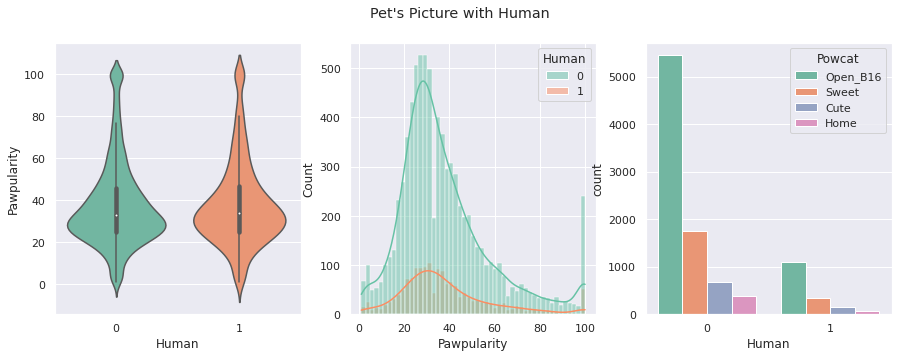

In [22]:
fplot("Human", "Pet's Picture with Human")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

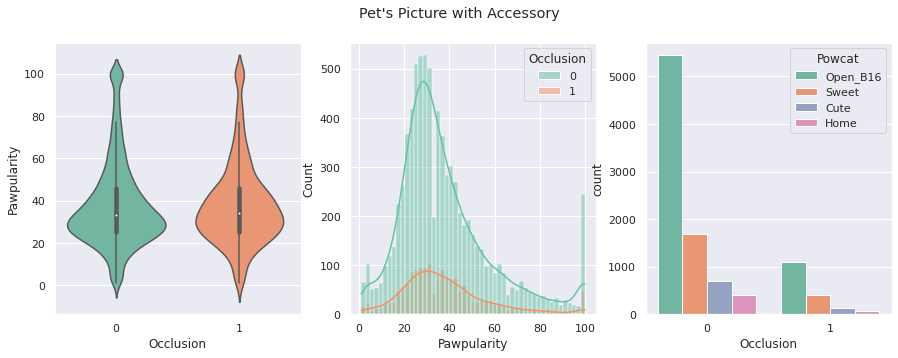

In [23]:
fplot("Occlusion", "Pet's Picture with Accessory")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

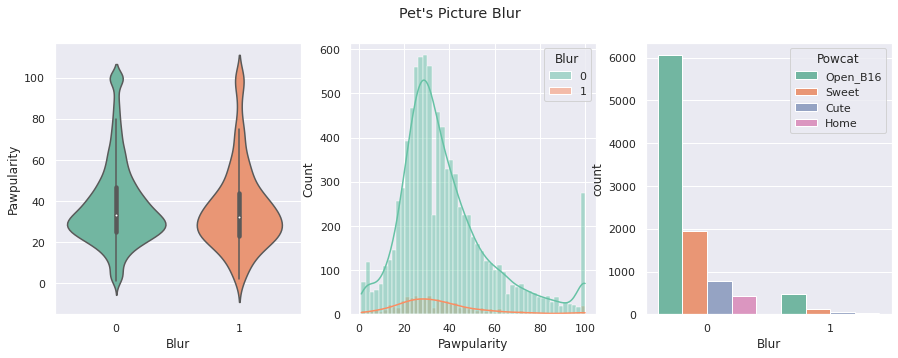

In [24]:
fplot("Blur", "Pet's Picture Blur")

In [25]:
pca=PCA(n_components=5)
pca.fit(pet_ft)
print(pca.explained_variance_ratio_)
x_pca=pca.fit_transform(pet_ft)
ps=pd.DataFrame(x_pca)
ps.head()

[0.39974862 0.14137949 0.12950605 0.08897432 0.04819253]


,0,1,2,3,4
0,1.483855,0.036235,-0.314885,0.462275,-0.726657
1,0.480018,0.081073,-0.256330,0.537559,0.408586
2,-0.524985,-0.859387,0.851422,-0.063767,-0.092214
3,-0.520402,-0.126156,-0.349508,-0.129864,-0.024449
4,1.500722,1.079018,0.344597,0.147568,-0.720940


(9912, 2)
          3         4
0  0.462275 -0.726657
1  0.537559  0.408586
2 -0.063767 -0.092214
3 -0.129864 -0.024449
4  0.147568 -0.720940


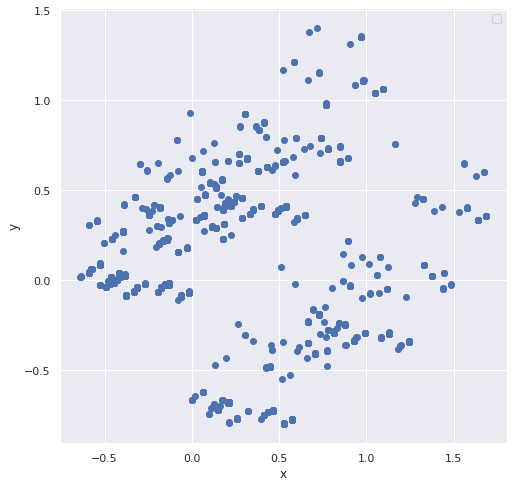

In [26]:
#try
topc=pd.DataFrame(ps[[3,4]])
print(topc.shape)
print(topc.head())
fig=plt.figure(figsize=(8,8))
plt.plot(topc[3],topc[4],"o")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [27]:
cloud=KMeans(n_clusters=4,random_state=8).fit(topc)
centers=cloud.cluster_centers_
c_pred=cloud.predict(topc)


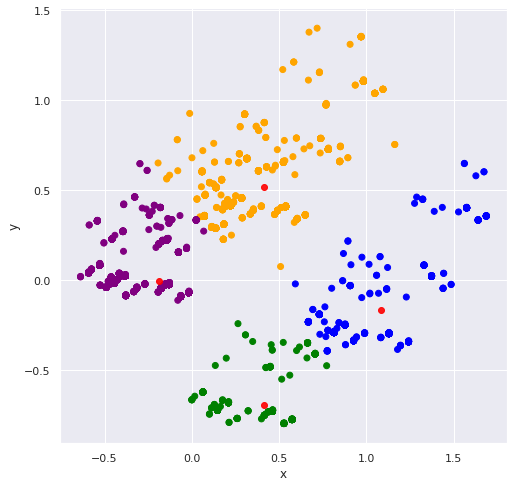

In [28]:
fig=plt.figure(figsize=(8,8))
colors=["orange","purple","blue", "green"]
colored=[colors[k] for k in c_pred]
plt.scatter(topc[3],topc[4], color=colored)
for ci,c in enumerate(centers):
    plt.plot(c[0],c[1],"o",color="red", alpha=0.9)
plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [29]:
pet_ft=pet_ft.copy()
pet_ft["cluster"]=c_pred
pet_ft["label"]=train.Powcat
pet_ft.head(10)
pd.crosstab(index=pet_ft["cluster"],columns=pet_ft["label"])

label,Open_B16,Sweet,Cute,Home
cluster,,,,
0,779,271,86,52
1,4942,1527,615,361
2,330,147,66,23
3,485,143,59,26


**CNN**

In [30]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Conv1D, MaxPooling1D
from keras.layers import Dense, Activation, Dropout, Flatten
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

**Load the pictures**

In [32]:
path = '../input/petfinder-pawpularity-score/train/'
training_img = os.listdir(path) # list all training images names
print('There are {} images in the training directory'.format(len(training_img)))
# data_list = pickle.load(open(training_img, "rb"))
print(len(training_img))

There are 9912 images in the training directory
9912


In [33]:
print(training_img[:5])

['7954ebb5c90d9618e34959df0ad5f062.jpg', '2969162fab1d0e5a65e4ce02db267745.jpg', '9f32ae94d7723414cb8fa881a1c6626c.jpg', 'b8f920f44800ee71e4659dea84bc9bef.jpg', '7fc71b8da143721939715b1cfe22122f.jpg']


In [34]:
model = Sequential()
num_classes = 2

# # TODO: Conv1
model.add(Conv2D(filters=32, kernel_size=7,padding="same",activation="relu",input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=7, strides=4, padding="valid"))
# # TODO: Conv2
model.add(Conv2D(filters=16, kernel_size=5,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=7, strides=4, padding="valid"))
# # TODO: Flatten the layer
model.add(Flatten())
# # TODO: Add the intermediate fully connected layers (Dense in keras)
model.add(Dense(64, activation='relu'))
# # TODO: Add the final fully connected layer with the softmax activation function
model.add(Dense(4, activation='softmax'))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2